# Analysis of salaries in Croatia

For this project we scraped jobs salaries in Croatia  (www.mojaplaća.hr)  and aparmtent prices in Zagreb(www.crozilla.hr). In this project, we will make an analysis of the salary of jobs and determine which jobs are good and which are poorly paid. We will compare salaries and make an analysis of which salary would be enough to repay the loan within a certain period of time for cheapest apartments in Zagreb. All prices are in euros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
import numpy as np

In [2]:
df=pd.read_csv("jobs_salary_data")
df.head()

,Unnamed: 0,Job,Salary,Job_category
0,0,Administrative Worker,498 - 924,Administration
1,1,"Archivist, Registry Administrator",449 - 922,Administration
2,2,Assistant,"583 - 1,329",Administration
3,3,Chief Receptionist Officer,533 - 990,Administration
4,4,Office Manager,"599 - 1,389",Administration


In [3]:
df2=df.drop("Unnamed: 0",axis=1)
df2.head()

,Job,Salary,Job_category
0,Administrative Worker,498 - 924,Administration
1,"Archivist, Registry Administrator",449 - 922,Administration
2,Assistant,"583 - 1,329",Administration
3,Chief Receptionist Officer,533 - 990,Administration
4,Office Manager,"599 - 1,389",Administration


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job           404 non-null    object
 1   Salary        396 non-null    object
 2   Job_category  404 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


## How many category and jobs are in Croatia

In [5]:
len(df2["Job_category"].unique())

38

In [6]:
len(df2["Job"].unique())

393

We have 38 categories of jobs  and 393 jobs in Croatia.

## How many jobs are in certain category 

<AxesSubplot:xlabel='Number of jobs'>

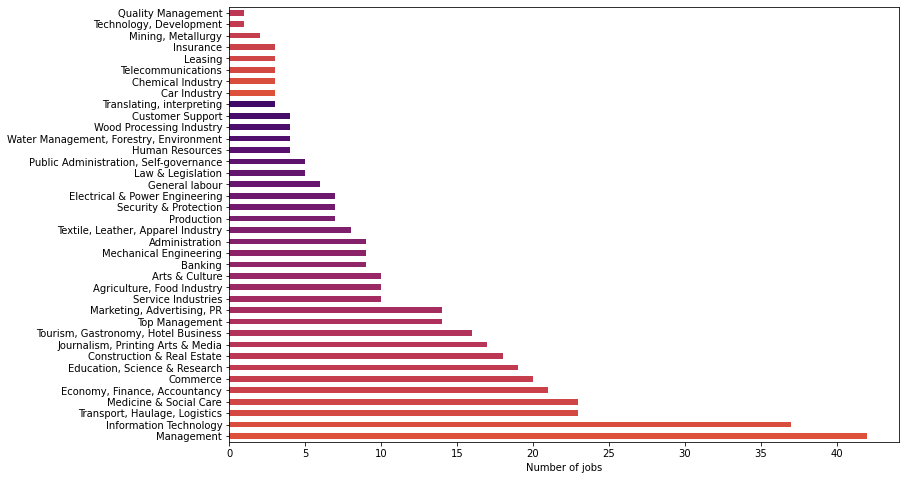

In [7]:
# Average sqft price  by location in Zagreb
jobs=df2["Job_category"].value_counts()
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.xlabel("Number of jobs")
jobs.plot.barh(x="Job_category", y='Number of jobs', color=color , figsize=(12,8))

As we can see Menagment and Information Technology are categories with most jobs. Technology,Development  and Quality Managment have at least jobs.

## Analyzing average salary by category

Before we start to analyze job salary we will explore jobs for which  we don't know a salary and we will decide what are we going to do with them.

In [8]:
a=df2["Salary"].isnull()
df2[a]

,Job,Salary,Job_category
28,Wardrobe Assistant,NaN,Arts & Culture
238,Restaurant manager,NaN,Management
252,CRM specialist,NaN,"Marketing, Advertising, PR"
311,Deminer,NaN,Security & Protection
332,Clothing-presser/ Ironer,NaN,"Textile, Leather, Apparel Industry"
333,Clothing/textile technologist,NaN,"Textile, Leather, Apparel Industry"
339,Textile manipulators,NaN,"Textile, Leather, Apparel Industry"
399,Meteorologist,NaN,"Water Management, Forestry, Environment"


Since we have only 8 jobs with no salary info we will just drop those rows.

In [9]:
df3=df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 403
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job           396 non-null    object
 1   Salary        396 non-null    object
 2   Job_category  396 non-null    object
dtypes: object(3)
memory usage: 12.4+ KB


In [10]:
df3.head()

,Job,Salary,Job_category
0,Administrative Worker,498 - 924,Administration
1,"Archivist, Registry Administrator",449 - 922,Administration
2,Assistant,"583 - 1,329",Administration
3,Chief Receptionist Officer,533 - 990,Administration
4,Office Manager,"599 - 1,389",Administration


We will split salary range and calculate lowest,highest and average salary for each job.

In [11]:
df4=df3.copy()

In [12]:
#splitting salary range on lowest and highest
df4[["Min_salary","Max_salary"]]=df3["Salary"].str.split("-",expand=True)

In [13]:
df4["Max_salary"]=df4["Max_salary"].str.split(",").apply("".join)
df4["Min_salary"]=df4["Min_salary"].str.split(",").apply("".join)

In [14]:
#converting into integer
df4["Min_salary"]=df4["Min_salary"].astype(int)
df4["Max_salary"]=df4["Max_salary"].astype(int)

In [15]:
#average salary
df4["Avg_salary_job"]=(df4["Min_salary"]+df4["Max_salary"])/2

In [16]:
df4.describe()

,Min_salary,Max_salary,Avg_salary_job
count,396.000000,396.000000,396.000000
mean,621.909091,1454.257576,1038.083333
std,148.039960,681.169649,398.545665
min,449.000000,673.000000,561.000000
25%,512.000000,1026.000000,783.750000
50%,591.000000,1201.500000,892.500000
75%,695.000000,1722.250000,1201.500000
max,1322.000000,5762.000000,3373.500000


In [17]:
df4.head()

,Job,Salary,Job_category,Min_salary,Max_salary,Avg_salary_job
0,Administrative Worker,498 - 924,Administration,498,924,711.0
1,"Archivist, Registry Administrator",449 - 922,Administration,449,922,685.5
2,Assistant,"583 - 1,329",Administration,583,1329,956.0
3,Chief Receptionist Officer,533 - 990,Administration,533,990,761.5
4,Office Manager,"599 - 1,389",Administration,599,1389,994.0


## Analyzing salaries by category

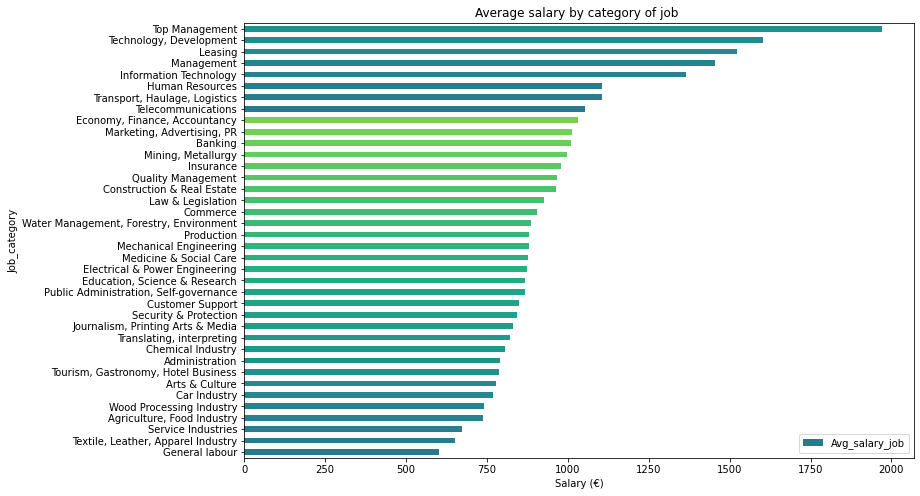

In [83]:
# Average salary by category of job in Croatia
jobs=df4.groupby("Job_category")["Avg_salary_job"].mean().reset_index("Job_category")
color = cm.viridis(np.linspace(.4, .8, 30))
jobs=jobs.sort_values("Avg_salary_job" , ascending=[True])
jobs.plot.barh(x="Job_category", y='Avg_salary_job', color=color , figsize=(12,8))
plt.title("Average salary by category of job ")
plt.xlabel("Salary (€)")
plt.show()

From graph above we can see that the highest salaries are in Top Management,Technology&Development,Leasing,Management,Information Technology and the lowest are in General labour,Textile&Leather,Service Industries,Agriculture&Food Industry. 

## Analyzing salaries by jobs

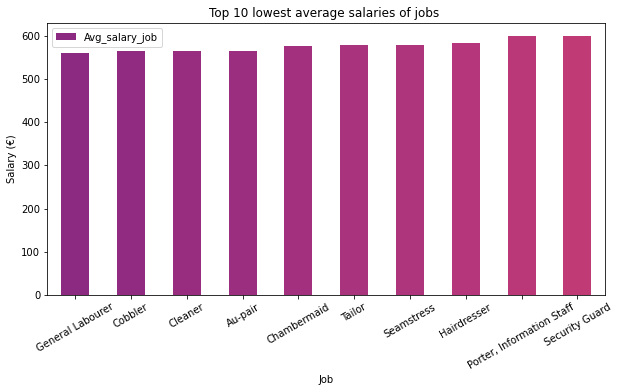

In [105]:
#top 10 lowest average salaries of jobs in Croatia
min_job=df4.groupby("Job")["Avg_salary_job"].min().reset_index("Job")
color = cm.magma(np.linspace(.4, .8, 30))
min_job=min_job.sort_values("Avg_salary_job" , ascending=[True])[:10]
min_job.plot.bar(x="Job", y='Avg_salary_job', color=color , figsize=(10,5))
plt.title("Top 10 lowest average salaries of jobs ")
plt.xticks(rotation=30)
plt.ylabel("Salary (€)")
plt.show()

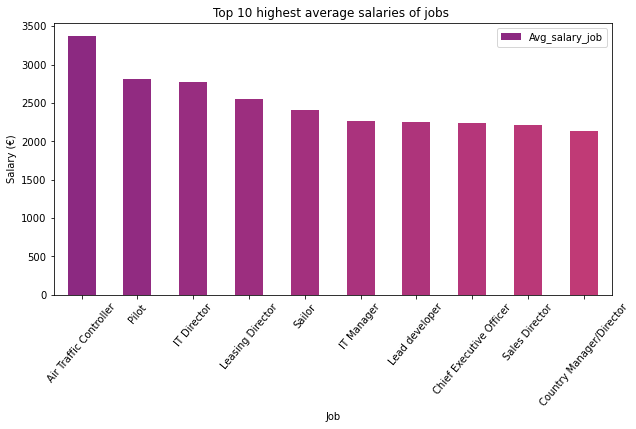

In [104]:
# top 10 highest average salaries of jobs in Croatia
min_job=df4.groupby("Job")["Avg_salary_job"].min().reset_index("Job")
color = cm.magma(np.linspace(.4, .8, 30))
min_job=min_job.sort_values("Avg_salary_job" , ascending=[False])[:10]
min_job.plot.bar(x="Job", y='Avg_salary_job', color=color , figsize=(10,5))
plt.title("Top 10 highest average salaries of jobs ")
plt.xticks(rotation=50)
plt.ylabel("Salary (€)")
plt.show()

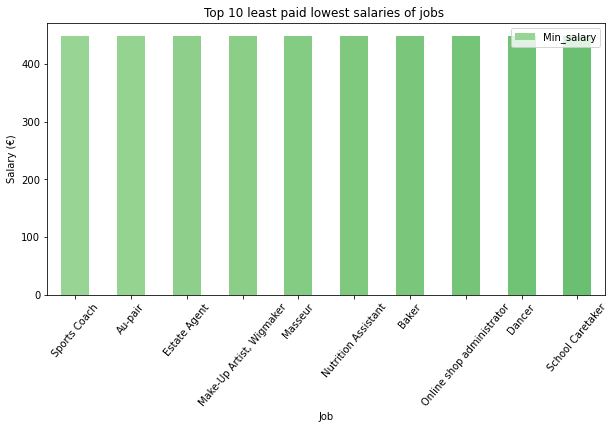

In [103]:
#top 10 least  paid lowest salaries of jobs in Croatia
min_job=df4.groupby("Job")["Min_salary"].min().reset_index("Job")
color = cm.Greens(np.linspace(.4, .8, 30))
min_job=min_job.sort_values("Min_salary" , ascending=[True])[:10]
min_job.plot.bar(x="Job", y='Min_salary', color=color , figsize=(10,5))
plt.title("Top 10 least paid lowest salaries of jobs ")
plt.xticks(rotation=50)
plt.ylabel("Salary (€)")
plt.show()

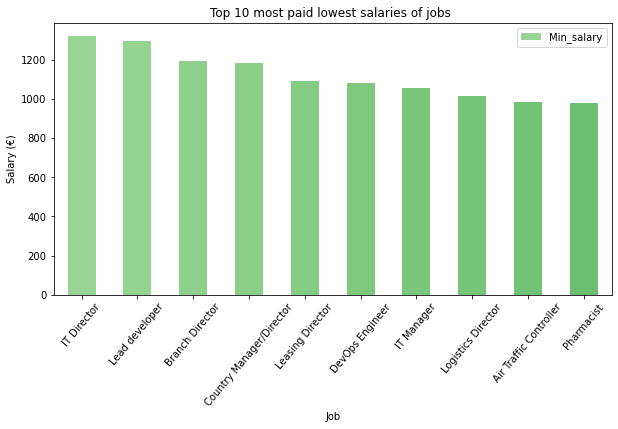

In [102]:
#top 10 most  paid lowest salaries of jobs in Croatia
max_job=df4.groupby("Job")["Min_salary"].min().reset_index("Job")
color = cm.Greens(np.linspace(.4, .8, 30))
max_job=max_job.sort_values("Min_salary" , ascending=[False])[:10]
max_job.plot.bar(x="Job", y='Min_salary', color=color , figsize=(10,5))
plt.title("Top 10 most paid lowest salaries of jobs ")
plt.xticks(rotation=50)
plt.ylabel("Salary (€)")
plt.show()

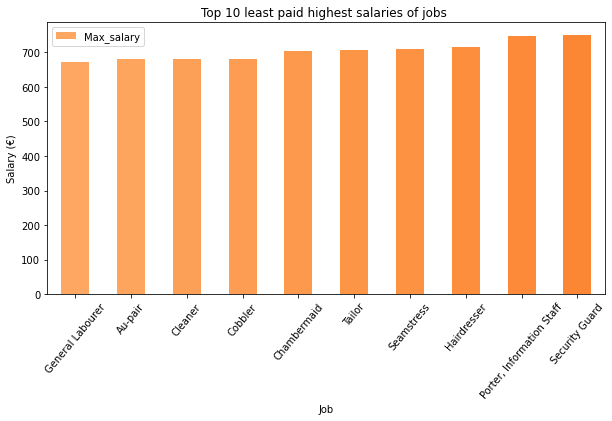

In [106]:
#top 10 least paid highest salaries of jobs in Croatia
min_job=df4.groupby("Job")["Max_salary"].max().reset_index("Job")
color = cm.Oranges(np.linspace(.4, .8, 30))
min_job=min_job.sort_values("Max_salary" , ascending=[True])[:10]
min_job.plot.bar(x="Job", y='Max_salary', color=color , figsize=(10,5))
plt.title("Top 10 least paid highest salaries of jobs ")
plt.xticks(rotation=50)
plt.ylabel("Salary (€)")
plt.show()

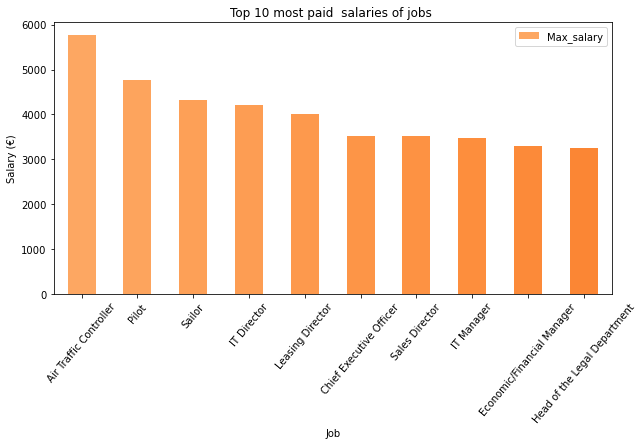

In [108]:
#top 10 most paid salaries of jobs in Croatia
min_job=df4.groupby("Job")["Max_salary"].max().reset_index("Job")
color = cm.Oranges(np.linspace(.4, .8, 30))
min_job=min_job.sort_values("Max_salary" , ascending=[False])[:10]
min_job.plot.bar(x="Job", y='Max_salary', color=color , figsize=(10,5))
plt.title("Top 10 most paid  salaries of jobs ")
plt.xticks(rotation=50)
plt.ylabel("Salary (€)")
plt.show()

## Analysis of loan repayment depending on salary

We will assume that the largest loan we can raise is a third of our salary. We will find the cheapest apartment in Zagreb and based on that, we will find out which are the jobs with which we can repay the loan,for cheapest apartment,within a certain period of time and vice versa. 

In [109]:
df4["credit_avg_salary"]=round(df4["Avg_salary_job"]*(1/3),2)
df4["credit_min_salary"]=round(df4["Min_salary"]*(1/3),2)
df4["credit_max_salary"]=round(df4["Max_salary"]*(1/3),2)
df4.head()

,Job,Salary,Job_category,Min_salary,Max_salary,Avg_salary_job,credit_avg_salary,credit_min_salary,credit_max_salary
0,Administrative Worker,498 - 924,Administration,498,924,711.0,237.00,166.00,308.00
1,"Archivist, Registry Administrator",449 - 922,Administration,449,922,685.5,228.50,149.67,307.33
2,Assistant,"583 - 1,329",Administration,583,1329,956.0,318.67,194.33,443.00
3,Chief Receptionist Officer,533 - 990,Administration,533,990,761.5,253.83,177.67,330.00
4,Office Manager,"599 - 1,389",Administration,599,1389,994.0,331.33,199.67,463.00


In [110]:
apartments=pd.read_csv("../zagreb_housing_scrapping/apartment_zg")
apartments.head()

,Unnamed: 0,Location,Post_number,Price,Price_per_sqft,Living_area,Rooms
0,0,Folnegovićevo naselje,10000,110000,2115,52,2.0
1,1,Folnegovićevo naselje,10000,80000,1667,48,2.0
2,2,Folnegovićevo naselje,10000,115000,1797,64,2.0
3,3,Folnegovićevo naselje,10000,145000,2231,65,3.0
4,4,Folnegovićevo naselje,10000,100000,1856,53,3.0


In [111]:
apartments=apartments[apartments["Location"]!="other"]

In [28]:
#top 5 cheapest apartments
top_5_cheapest=apartments[["Location","Price"]].sort_values("Price",ascending=True)[:5]
top_5_cheapest

,Location,Price
1345,Črnomerec,41000
988,Stenjevec,43000
1166,Voltino,49000
1337,Črnomerec,50000
196,Donji Grad,52000


We are going to set a threshold for 50 000 € credit which we will repaying for 15 years.

In [113]:
#monthly loan installment
threshold=50000/180
threshold

277.77777777777777

In [114]:
min_salary_low=df4[df4["credit_min_salary"]<threshold]
print("The number of jobs with which we cannot repay the loan in 15 years:",len(min_salary_low))

min_salary_high=df4[df4["credit_min_salary"]>threshold]
print("The number of jobs with which we can repay the loan in 15 years:",len(min_salary_high))

The number of jobs with which we cannot repay the loan in 15 years: 362
The number of jobs with which we can repay the loan in 15 years: 34


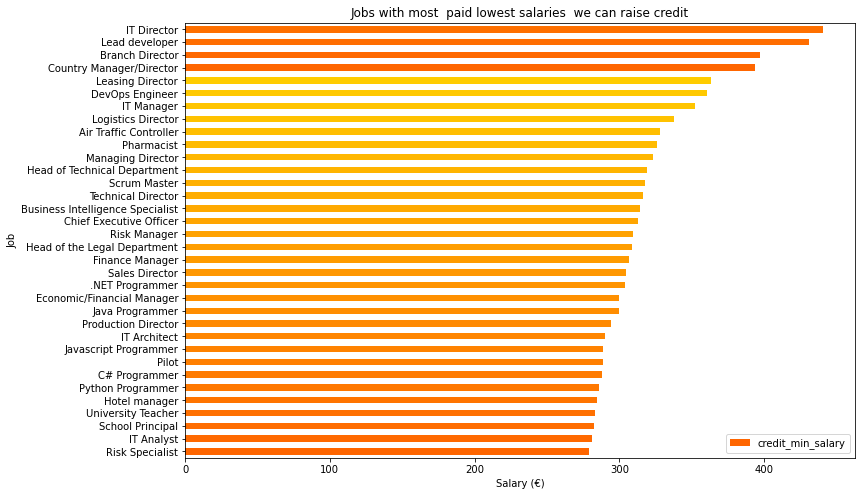

In [119]:
#jobs with the salaries we can raise credit for
jobs=min_salary_high.groupby("Job")["credit_min_salary"].min().reset_index("Job")
color = cm.autumn(np.linspace(.4, .8, 30))
jobs=jobs.sort_values("credit_min_salary" , ascending=[True])
jobs.plot.barh(x="Job", y='credit_min_salary', color=color , figsize=(12,8))
plt.title("Jobs with the highest paid minimum wages with which we can raise credit")
plt.xlabel("Salary (€)")
plt.show()

In [68]:
max_salary_low=df4[df4["credit_max_salary"]<threshold]
print("The number of jobs with which we cannot repay the loan in 15 years:",len(max_salary_low))

max_salary_high=df4[df4["credit_max_salary"]>threshold]
print("The number of jobs with which we can repay the loan in 15 years:",len(max_salary_high))

The number of jobs with which we cannot repay the loan in 15 years: 25
The number of jobs with which we can repay the loan in 15 years: 371


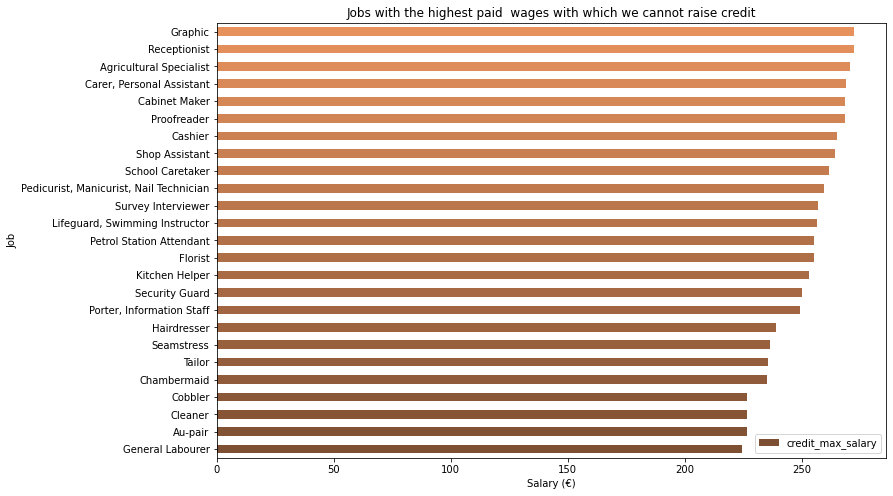

In [120]:
jobs=max_salary_low.groupby("Job")["credit_max_salary"].min().reset_index("Job")
color = cm.copper(np.linspace(.4, .8, 30))
jobs=jobs.sort_values("credit_max_salary" , ascending=[True])
jobs.plot.barh(x="Job", y='credit_max_salary', color=color , figsize=(12,8))
plt.title("Jobs with the highest paid  wages with which we cannot raise credit")
plt.xlabel("Salary (€)")
plt.show()

In [72]:
avg_salary_low=df4[df4["credit_avg_salary"]<threshold]
print("The number of jobs with which we cannot repay the loan in 15 years:",len(avg_salary_low))

avg_salary_high=df4[df4["credit_avg_salary"]>threshold]
print("The number of jobs with which we can repay the loan in 15 years:",len(avg_salary_high))

The number of jobs with which we cannot repay the loan in 15 years: 143
The number of jobs with which we can repay the loan in 15 years: 253


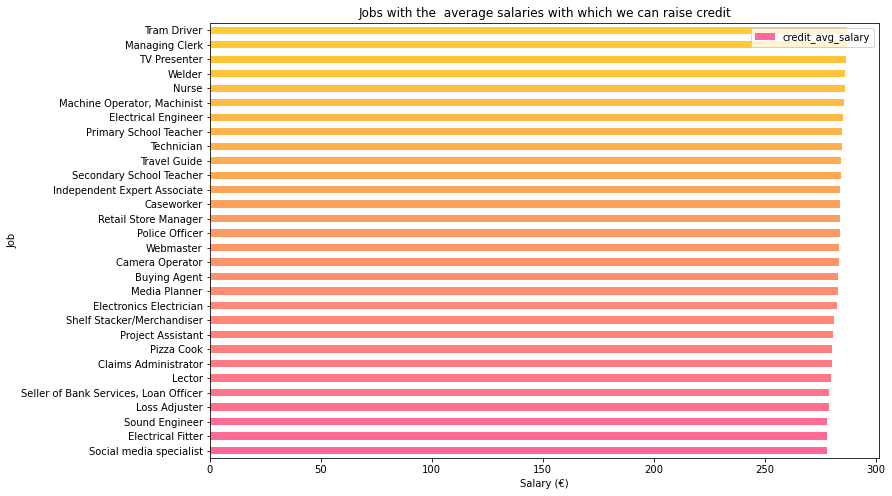

In [122]:
jobs=avg_salary_high.groupby("Job")["credit_avg_salary"].min().reset_index("Job")
color = cm.spring(np.linspace(.4, .8, 30))
jobs=jobs.sort_values("credit_avg_salary" , ascending=[True])[:30]
jobs.plot.barh(x="Job", y='credit_avg_salary', color=color , figsize=(12,8))
plt.title("Jobs with the  average salaries with which we can raise credit")
plt.xlabel("Salary (€)")
plt.show()

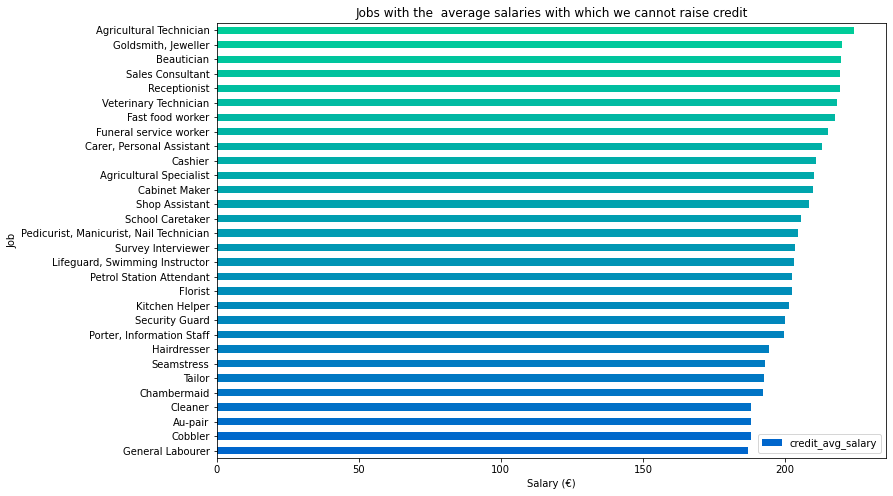

In [123]:
jobs=avg_salary_low.groupby("Job")["credit_avg_salary"].min().reset_index("Job")
color = cm.winter(np.linspace(.4, .8, 30))
jobs=jobs.sort_values("credit_avg_salary" , ascending=[True])[:30]
jobs.plot.barh(x="Job", y='credit_avg_salary', color=color , figsize=(12,8))
plt.title("Jobs with the  average salaries with which we cannot raise credit")
plt.xlabel("Salary (€)")
plt.show()